<a href="https://colab.research.google.com/github/ajangra0001/Book-Recommendation-system-ML-Project/blob/main/Book_Recommendation_system_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book recommendation system



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

A book recommendation system is a valuable tool for helping users discover new books based on their preferences and interests. In this project, we explore the creation of such a system using unsupervised machine learning techniques. The primary goal is to group similar books together and recommend them to users based on their input preferences. We follow a step-by-step process that involves data collection, preprocessing, feature engineering, clustering, and recommendation generation.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Problem Statement: Building an Effective Book Recommendation System

In the ever-expanding world of literature, readers often face the challenge of discovering books that align with their tastes and preferences. This creates a need for an efficient book recommendation system that can enhance user experience, encourage exploration, and foster a sense of personalized discovery. The goal is to develop a recommendation system using unsupervised machine learning techniques that can accurately group similar books together and provide meaningful recommendations based on user input.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

### Dataset Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Books.csv to Books.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Users.csv to Users.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ratings.csv to Ratings.csv


In [ ]:
# Load Dataset
books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

<ipython-input-8-14ffbbf514e5>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


### Dataset First View

In [ ]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


### Dataset Information

In [ ]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
books.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

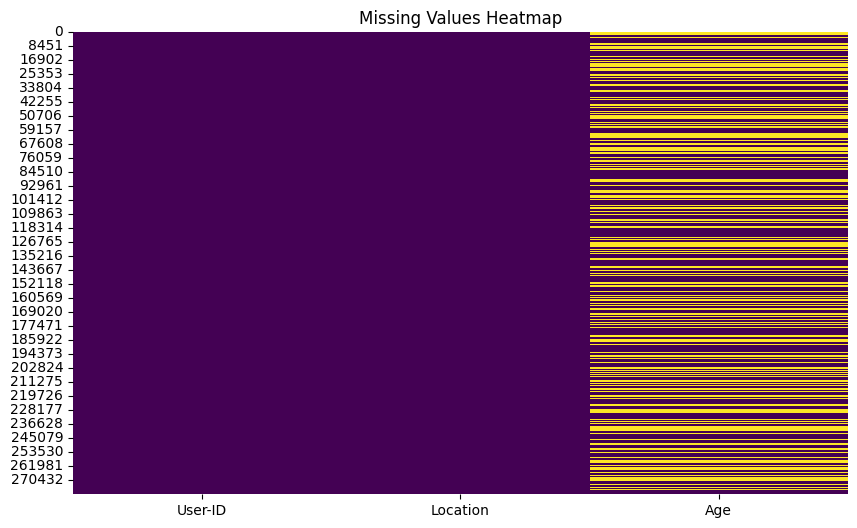

In [ ]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(users.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

 the context of a book recommendation system, the dataset would typically include information about various books. Common features might include:

Title: The name of the book.

Author: The person who wrote the book.


Description: A brief summary or description of the book's content.

User Ratings/Reviews: If available, numerical ratings or written reviews by users.

Publishing Date: The date when the book was published. *italicized text*

This information is used to train machine learning models, create clusters of similar books, and provide recommendations based on user preferences.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
books.columns


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
# Dataset Describe
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57340,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [ ]:
ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


### Variables Description

In a book recommendation system dataset, various variables or features provide information about different aspects of each book. Here's a typical set of variables you might find in such a dataset:


*   ISBN (International Standard Book Number): A unique numerical identifier assigned to each edition and variation of a book, facilitating accurate cataloging and identification.

*   Book-Title: The title of the book, representing its name or identity.
*   Book-Author: The author of the book, indicating the individual responsible for creating the content.

*   Year of Publication : The date when the book was published, offering information about its chronological order


*   Publisher: The entity responsible for publishing and distributing the book.


*   Book Ratings: Numerical ratings given by users who have read the book, indicating their subjective evaluation of its quality.


*   Publisher: The entity responsible for publishing and distributing the book.
*   Image-URL-S: A URL (web address) pointing to a small-sized image of the book cover. This can be used for visual representation or display purposes.

*   Image-URL-M: A URL pointing to a medium-sized image of the book cover. Similar to the small image, this provides a larger visual representation.
*   Image-URL-L: A URL pointing to a large-sized image of the book cover. This provides the highest resolution image for a more detailed visual representation.


*   User-ID: A unique identifier assigned to each user in the dataset. Each user is given a distinct User-ID to differentiate their interactions and ratings.
*   Location: The geographical location or address associated with the user. This variable provides information about where the user is located.



*   Age: The age of the user. This variable represents the age of the individual providing book ratings. Note that it might contain missing values or be subject to data quality considerations.
*   Book-Rating: The rating given by a user to a specific book. It's a numerical value representing the user's opinion or preference for a particular book. Ratings often range from 1 to 10, with higher values indicating a more positive opinion.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in books.columns.tolist():
  print("No. of unique values in ",i,"is",books[i].nunique(),".")

No. of unique values in  ISBN is 271360 .
No. of unique values in  Book-Title is 242135 .
No. of unique values in  Book-Author is 102023 .
No. of unique values in  Year-Of-Publication is 202 .
No. of unique values in  Publisher is 16807 .
No. of unique values in  Image-URL-S is 271044 .
No. of unique values in  Image-URL-M is 271044 .
No. of unique values in  Image-URL-L is 271041 .


In [ ]:
for i in users.columns.tolist():
  print("No. of unique values in ",i,"is",users[i].nunique(),".")

No. of unique values in  User-ID is 278858 .
No. of unique values in  Location is 57340 .
No. of unique values in  Age is 165 .


In [ ]:
for i in ratings.columns.tolist():
  print("No. of unique values in ",i,"is",ratings[i].nunique(),".")

No. of unique values in  User-ID is 105283 .
No. of unique values in  ISBN is 340556 .
No. of unique values in  Book-Rating is 11 .


## 3. ***Data Wrangling***

### Data Wrangling Code



Cleaning data

In cleaning data we perform following step:

  1. Remove duplicate rows
  2. Handling missing values.
  3. Convert columns to appropriate datatypes.
  4. Adding important columns



In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
books_df = books.copy()
users_df = users.copy()
ratings_df = ratings.copy()

In [ ]:
# Dropping duplicate values
books_df.drop_duplicates(inplace=True)

In [ ]:
# Dropping duplicate values
users_df.drop_duplicates(inplace=True)

In [ ]:
# Dropping duplicate values
ratings_df.drop_duplicates(inplace=True)

In [ ]:
# Checking all null values
books_df.isnull().sum().sort_values(ascending=False)[:6]

Image-URL-L            3
Publisher              2
Book-Author            1
ISBN                   0
Book-Title             0
Year-Of-Publication    0
dtype: int64

In [ ]:
books_df.dropna(inplace=True)

In [ ]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
# Checking all null values
users_df.isnull().sum().sort_values(ascending=False)[:6]

Age         110762
User-ID          0
Location         0
dtype: int64

In [ ]:
users_df.dropna(inplace=True)

In [ ]:
users_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
# Checking all null values
ratings_df.isnull().sum().sort_values(ascending=False)[:6]

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
users_df

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

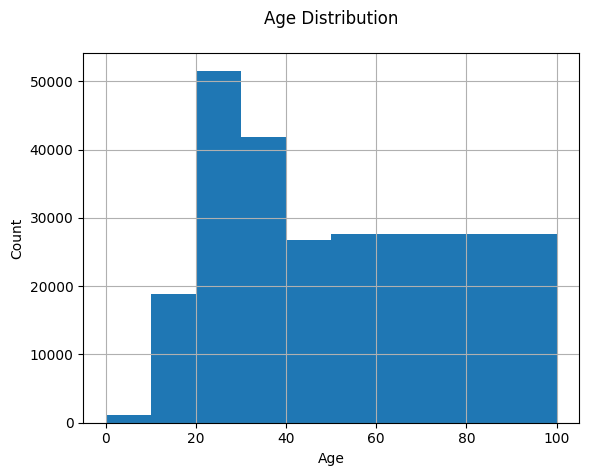

In [ ]:
# Chart - 1 visualization code
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a suitable choice for visualizing the distribution of quantitative data, such as age. It allows you to see the frequency or count of individuals falling into different age ranges.

##### 2. What is/are the insight(s) found from the chart?

The age group between 20 and 40 has a higher count

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consider focusing marketing efforts on this age group since it has a larger user base. Tailor advertising campaigns, promotions, and content to resonate with the preferences and interests of users aged 20 to 40.

#### Chart - 2

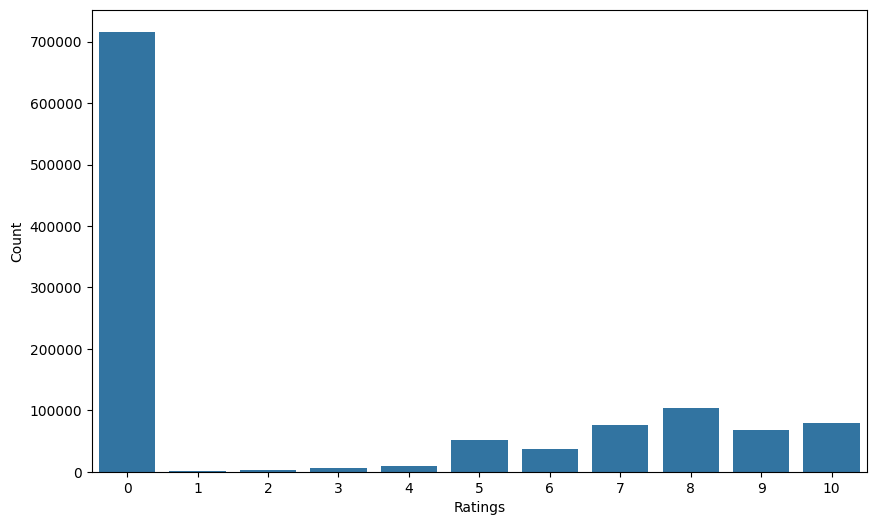

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
sns.countplot(data = ratings, x = 'Book-Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Ratings are categorical data, typically represented by discrete values (e.g., 1, 2, 3, 4, 5). Count plots are suitable for visualizing the distribution of categorical variables.
A count plot displays the frequency or count of each unique rating category. This allows for a clear and immediate understanding of the distribution of ratings in the dataset.

##### 2. What is/are the insight(s) found from the chart?

 The most frequent rating is 0

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

First and foremost, verify the integrity of your data. Ensure that the rating values are correctly recorded and that there are no data entry errors or anomalies.

#### Chart - 3

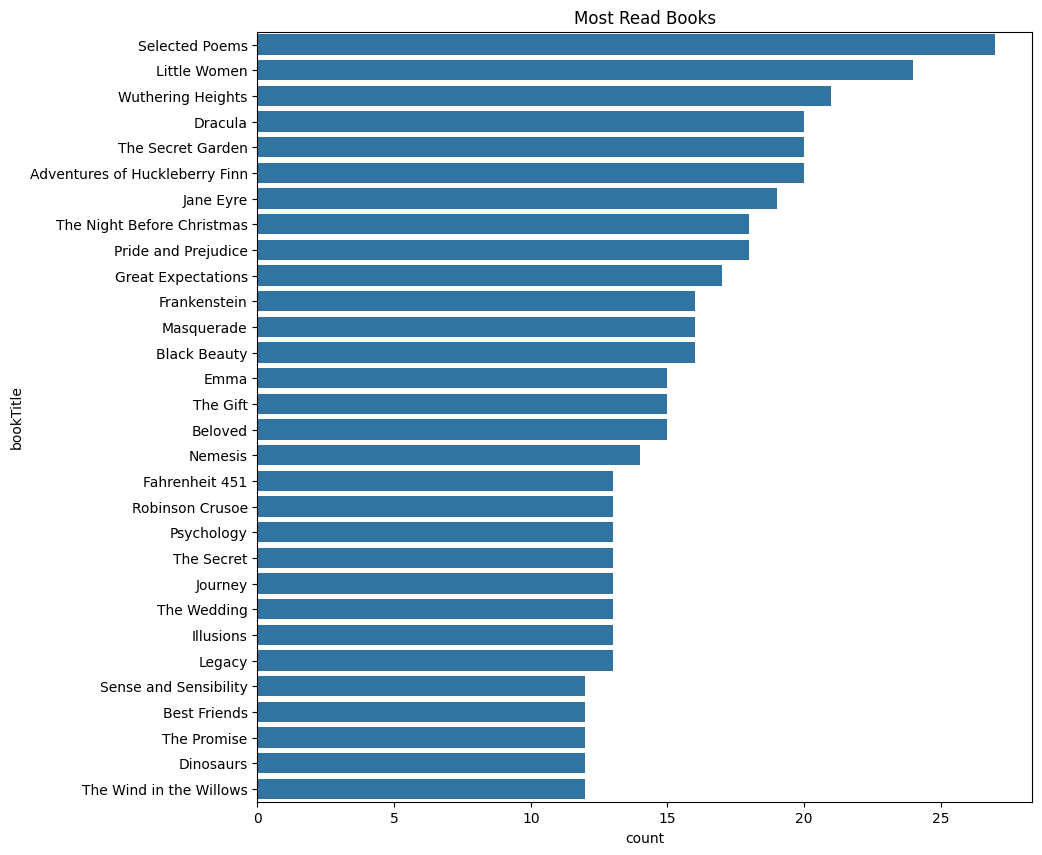

In [ ]:
# Chart - 3 visualization code
most_read = books_df['Book-Title'].value_counts().reset_index()
most_read.columns = ['bookTitle','count']

plt.figure(figsize = (10,10))
plt.title("Most Read Books")
sns.barplot(x = 'count', y = 'bookTitle', data = most_read.head(30));

##### 1. Why did you pick the specific chart?

A bar plot is effective for displaying the ranking of most-read books based on their counts. Each bar represents a book, and the length of the bar corresponds to the number of times the book has been read.
Using a horizontal bar plot is particularly effective when visualizing the "Top N" items, such as the top 30 most-read books in your case. This way, you can focus on the most significant contributors to the dataset.

##### 2. What is/are the insight(s) found from the chart?

 Based on the information that the most popular and widely read books in your dataset are "Selected Poems" and "The Wind in the Willows,"

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognize the popularity of "Selected Poems" and "The Wind in the Willows" in your content strategy. Consider featuring these books prominently in recommendations, promotions, and marketing materials.

#### Chart - 4

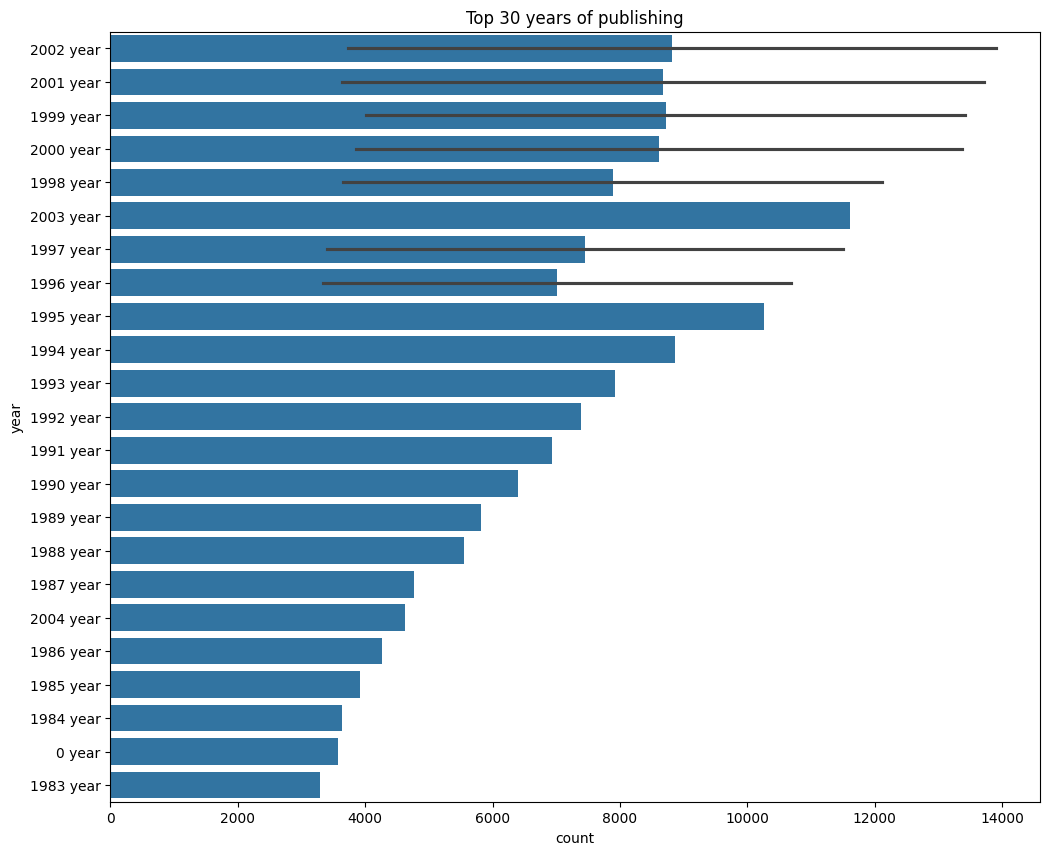

In [ ]:
# Chart - 4 visualization code
yearOP = books_df['Year-Of-Publication'].value_counts().reset_index()

yearOP.columns = ['value', 'count']

yearOP['year'] = yearOP['value'].astype(str) + ' year'

yearOP = yearOP.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 years of publishing')
sns.barplot(data = yearOP.head(30), x='count', y="year");

##### 1. Why did you pick the specific chart?

A horizontal bar plot is effective for comparing the count of books published in different years. It provides a clear and ordered representation of the distribution, making it easy to identify the years with the highest publication counts.

#### Chart - 5

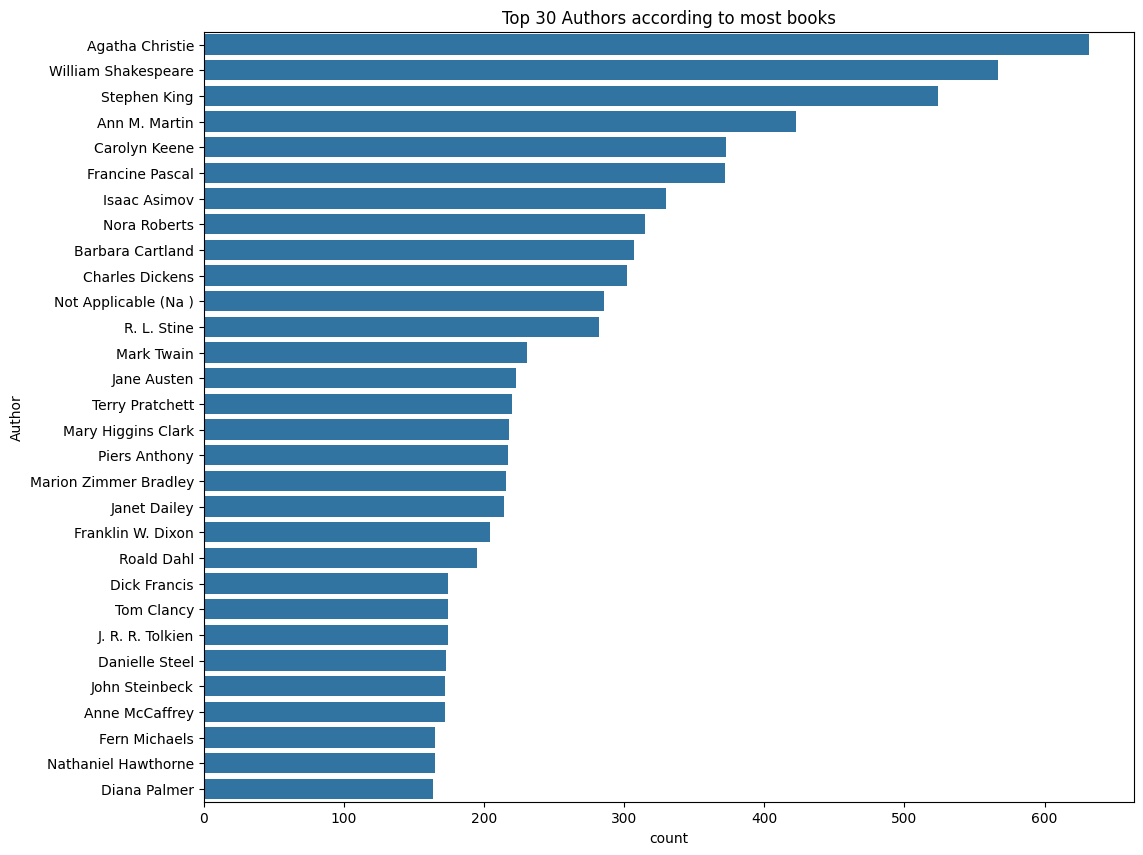

In [ ]:
# Chart - 5 visualization code
top_author = books_df['Book-Author'].value_counts().reset_index()
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
top_author = top_author.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Authors according to most books')
sns.barplot(data = top_author.head(30), x = 'count', y = 'Author');



##### 1. Why did you pick the specific chart?

A horizontal bar plot is effective for comparing the count of books by different authors. It provides a clear and ordered representation of the distribution, making it easy to identify the authors with the highest number of books.
The plot is focused on the top 30 authors, allowing you to concentrate on the most prolific authors. This is particularly useful when dealing with a large number of authors, as it highlights the most relevant information.

#### Chart - 6

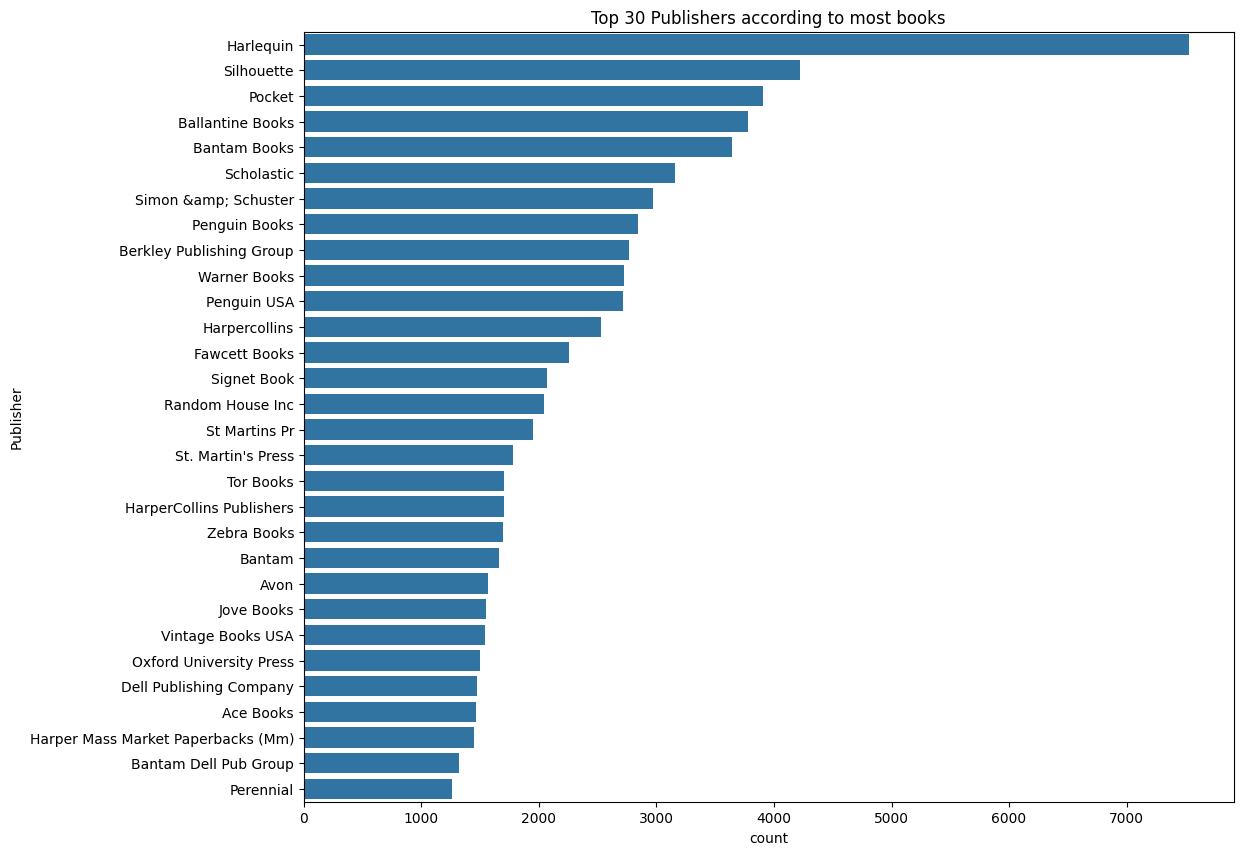

In [ ]:
# Chart - 6 visualization code
top_publisher = books_df['Publisher'].value_counts().reset_index()
top_publisher.columns = ['Publisher', 'count']
top_publisher['Publisher'] = top_publisher['Publisher']
top_publisher = top_publisher.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Publishers according to most books')
sns.barplot(data = top_publisher.head(30), x = 'count', y = 'Publisher');

##### 1. Why did you pick the specific chart?

A horizontal bar plot is effective for comparing the count of books by different publishers. It provides a clear and ordered representation of the distribution, making it easy to identify the publishers with the highest number of books.Focusing on the top 30 publishers allows you to concentrate on the most prolific publishers. This is particularly useful when dealing with a large number of publishers, as it highlights the most relevant information

#### Chart - 7

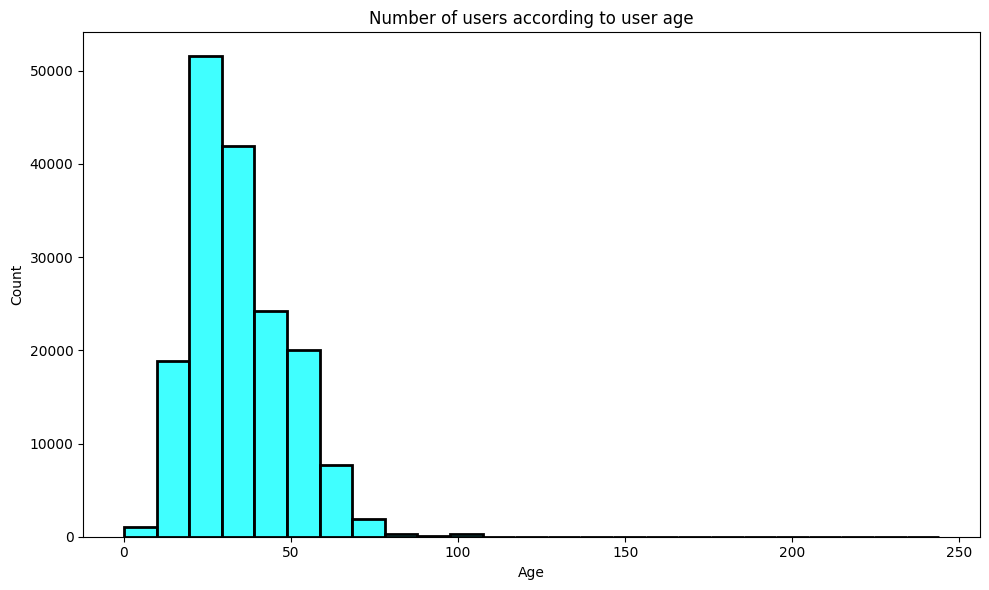

In [ ]:
# Chart - 7 visualization code
user_age = users.age
plt.figure(figsize=(10,6), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(user_age, bins=25, linewidth = 2, color = 'cyan', edgecolor = 'black');

##### 1. Why did you pick the specific chart?

A histogram is well-suited for displaying the distribution of quantitative data, such as user ages. It allows you to see the frequency or count of users in different age ranges.
By specifying bins, you can group ages into meaningful ranges, providing a clearer view of the distribution of user ages. In this case, you used 25 bins, giving you a detailed view of age distribution.

#### Chart - 8 - Correlation Heatmap

<ipython-input-61-051a555123c4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ratings_df.corr()


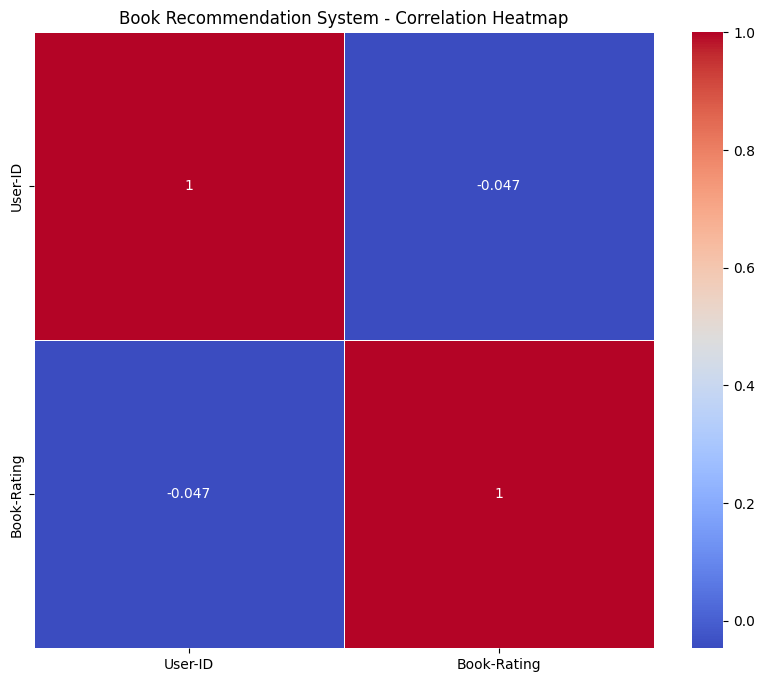

In [ ]:
# Correlation Heatmap visualization code
ratings_df = ratings_df.fillna(0)

# Calculate the correlation matrix
correlation_matrix = ratings_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Book Recommendation System - Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is effective for visualizing the pairwise relationships between different books based on user ratings. It helps identify patterns of similarity or dissimilarity in how users rate books.

#### Chart - 9 - Pair Plot

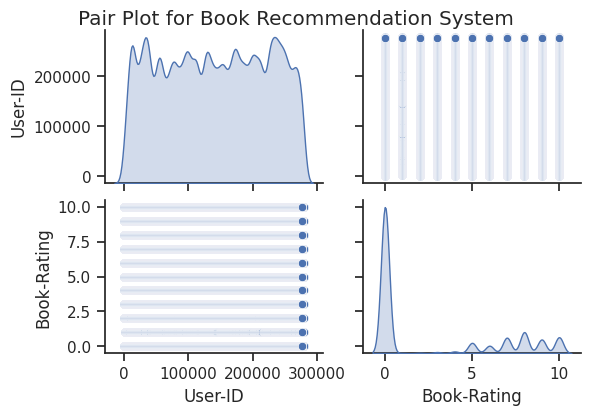

In [ ]:
# Pair Plot visualization code
sns.set(style="ticks")
sns.pairplot(ratings_df, height=2, aspect=1.5, diag_kind='kde')
plt.suptitle('Pair Plot for Book Recommendation System', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows for the exploration of relationships between multiple variables (books) simultaneously. Each scatterplot in the matrix represents the relationship between two books, offering a holistic view of their associations.The scatterplots in the lower triangle provide insights into the patterns and trends in how users rate pairs of books. The diagonal kernel density estimates (KDEs) provide smoothed distributions for individual books, revealing the distribution of user ratings.

#**5. Popularity Based Recommender System**

In [ ]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

<ipython-input-65-ebeed7a91fd4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [ ]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# ***7. Collaborative Filtering Based Recommender System***

In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [ ]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [ ]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [ ]:
pt.index[545]

"The Handmaid's Tale"

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**




Among top 20 Authors the highest number of books has been hold by Agatha Christie. Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare.

Harlequin has most number of books published, followed by Silhouette.

Number of Books published in yearly are between 1950 - 2005.

Most of the users are between 30-40 prefer more books and somewhat we can also view between 20-30.

As per ratings "Selected Poems" has been rated most followed by "Little Women". The countplot shows users have rated 0 the most, which means they haven't rated books at all.





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***